In [1]:
import nfinder
from napari.utils import nbscreenshot

# Synthetic dataset

In [2]:
#Generate random dataset
import numpy as np

seed = np.random.seed(20)
points = np.random.normal(size=(7, 2))

#Find neighbors graph
edges = nfinder.neighbors_graph(points)

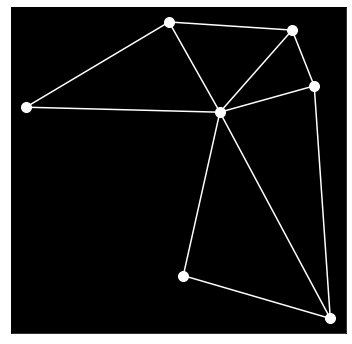

In [3]:
#Plot results
ax = nfinder.plot_neighbors_graph(points, edges, node_size=10)

# Real datasets

## *Drosophila melanogaster* (2D)
*Drosophila* embryo imaged with SiMView microscopy.


#### References
Stegmaier J, Amat F, Lemon WC, McDole K, Wan Y, Teodoro G, et al. Real-Time Three-Dimensional Cell Segmentation in Large-Scale Microscopy Data of Developing Embryos. Dev Cell. 2016;36: 225–240.

In [4]:
#Load image and labels
img, labels = nfinder.data('drosophila')  #R: nucleus, G: membrane, B: None

#Find centroids
points = nfinder.get_centroids(labels)

#Find neighbors graph
edges = nfinder.neighbors_graph(points)

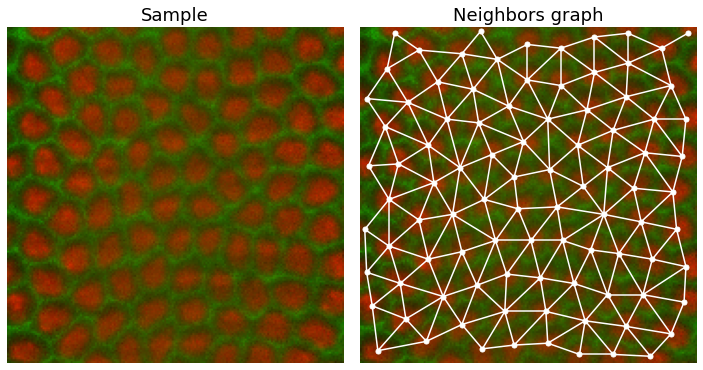

In [5]:
#Plot image and segmentation
axes = nfinder.plot_overlap(img, points, edges, show_titles=True)

## Caenorhabditis elegans (3D)
C. Elegans embryo whose cell nuclei and membranes were stained with mCherry and GFP, respectively.

#### References
Azuma Y, Onami S. Biologically constrained optimization based cell membrane segmentation in C. elegans embryos. BMC Bioinformatics. 2017;18: 307.

In [6]:
#Load image and labels
from skimage.io import imread
from skimage import measure

img, labels = nfinder.data('c_elegans')

#Find centroids given a segmentation
points = nfinder.get_centroids(labels)

#Find neighbors graph
edges = nfinder.neighbors_graph(points)

C:\Users\rodri\anaconda3\envs\nfinder-env\lib\site-packages\napari\_qt\__init__.py:54: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)


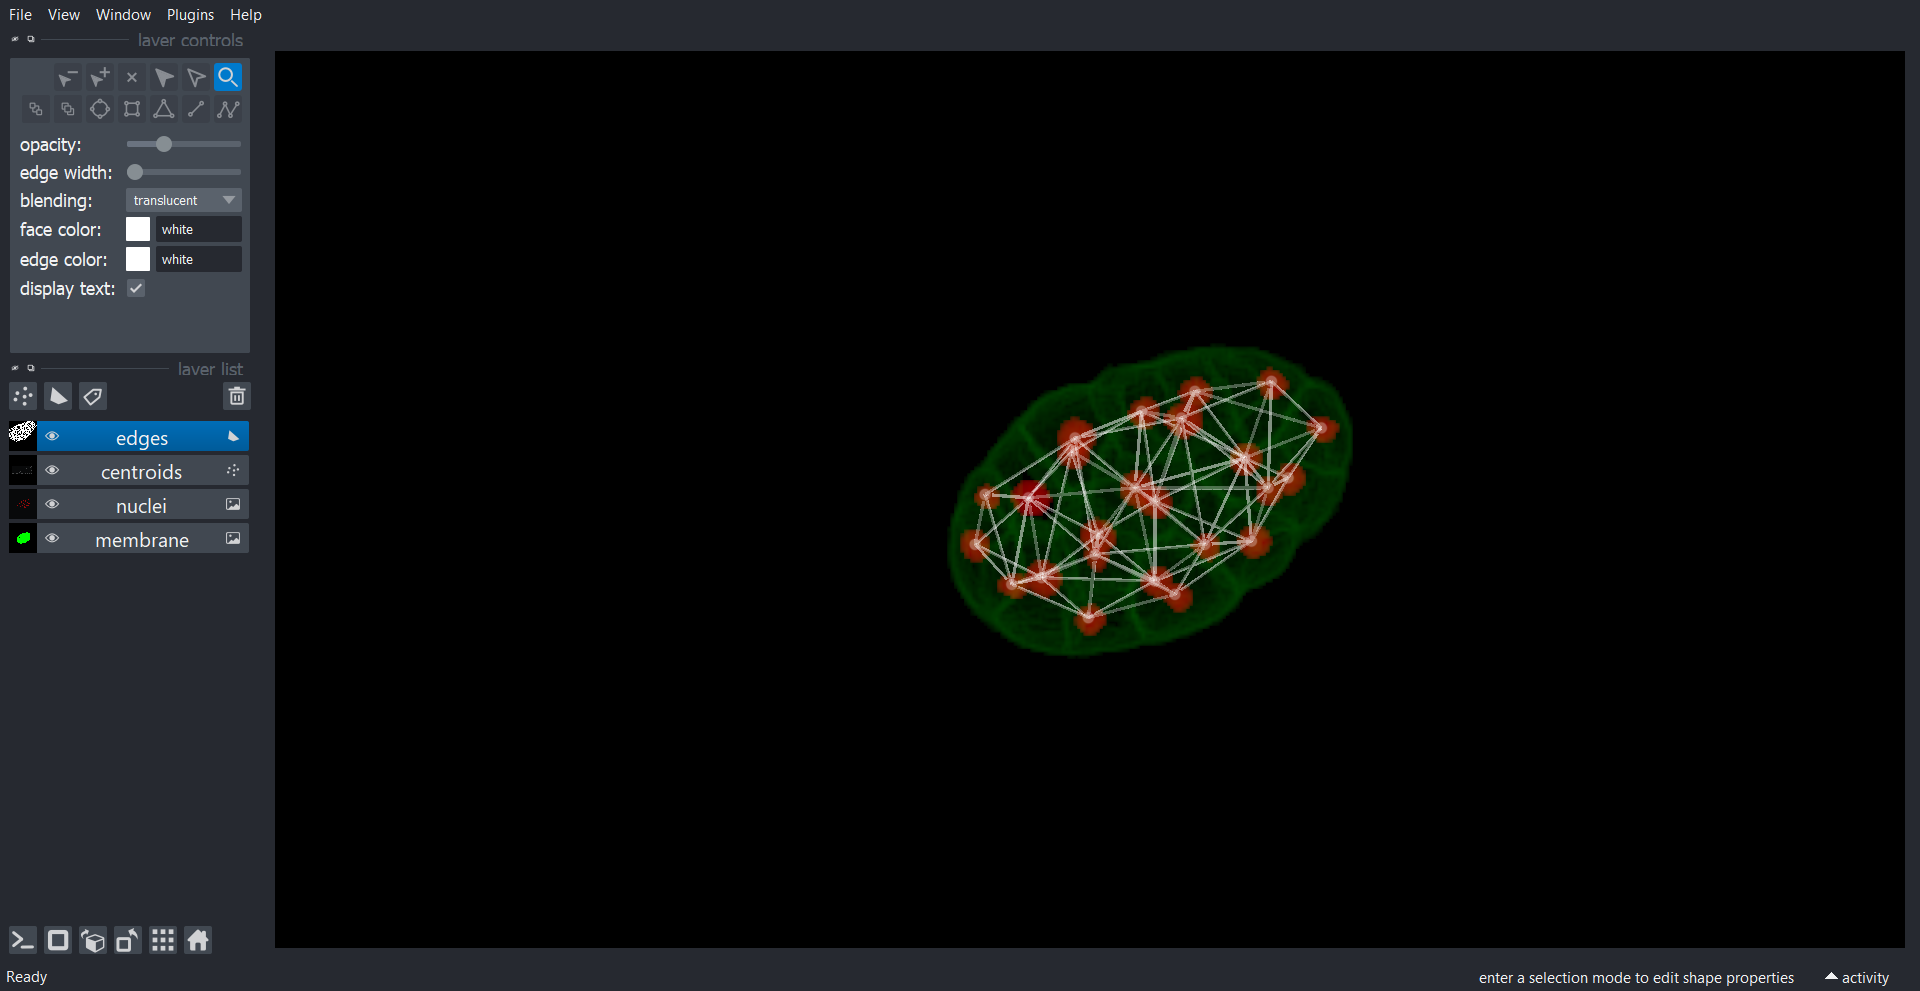

In [7]:
# Define scale for realistic 3D rendering
# Units in napari are arbitrary, so this can be changed for different applications.
scale = [0.500, 0.444, 0.444] # (z_scale, y_scale, x_scale) in um.

viewer = nfinder.plot_neighbors_graph(points, edges, img=img, scale=scale)
nbscreenshot(viewer)